# EDA

## Imports

In [60]:
import pandas as pd
import seaborn as sns

sns.set_palette(["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a", "#ffff99", "#b15928"]) # colorbrewer2

## Number of Samples

In [61]:
train = pd.read_csv("./data/train.csv", index_col="SeriesInstanceUID")
train.head()

,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
SeriesInstanceUID,,,,,,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.10004684224894397679901841656954650085,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.10005158603912009425635473100344077317,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1.2.826.0.1.3680043.8.498.10009383108068795488741533244914370182,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.10012790035410518400400834395242853657,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
train.shape

print("Number of samples: ", train.shape[0])

Number of samples:  4405


## Positive vs. Negative Cases

In [63]:
print(train["Aneurysm Present"].value_counts())

Aneurysm Present
0    2512
1    1893
Name: count, dtype: int64


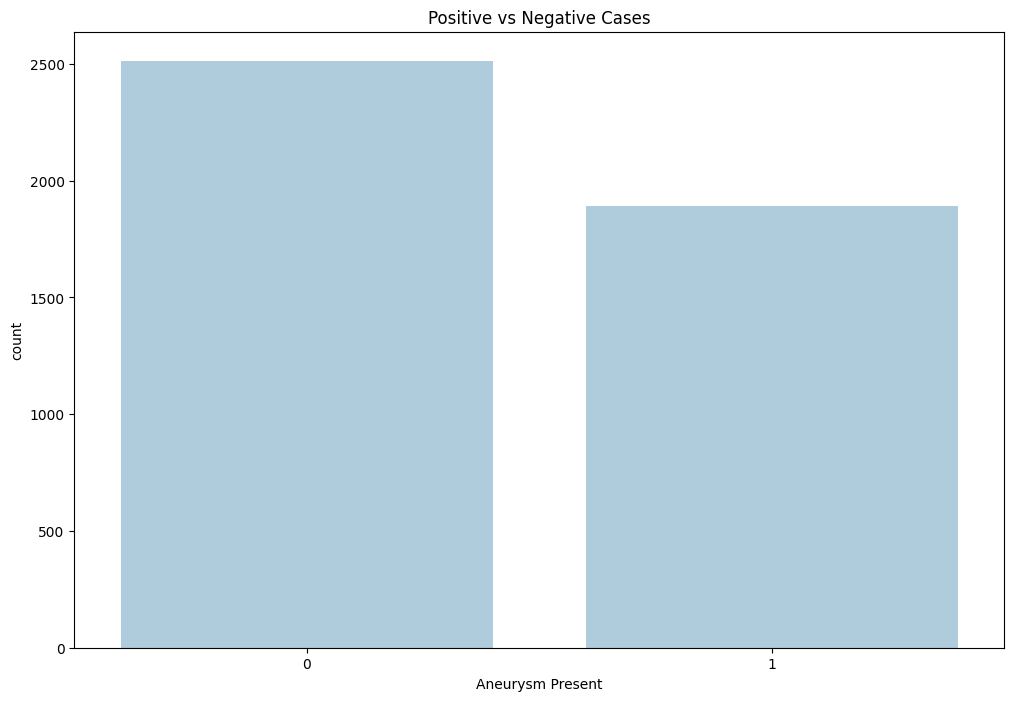

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x="Aneurysm Present")
plt.title("Positive vs Negative Cases")
plt.show()

## Positives Per Each Location

In [65]:
locations = train.columns[3:-1]
location_counts = train[locations].sum().sort_values(ascending=False)

print(location_counts.sum())

print("There are 13 possible locations for aneurysms.")
print("There can be more than one aneurysm per sample.")

location_counts

2203
There are 13 possible locations for aneurysms.
There can be more than one aneurysm per sample.


Anterior Communicating Artery                 366
Left Supraclinoid Internal Carotid Artery     340
Right Middle Cerebral Artery                  299
Right Supraclinoid Internal Carotid Artery    282
Left Middle Cerebral Artery                   220
Other Posterior Circulation                   115
Basilar Tip                                   113
Right Posterior Communicating Artery          101
Right Infraclinoid Internal Carotid Artery     99
Left Posterior Communicating Artery            87
Left Infraclinoid Internal Carotid Artery      79
Right Anterior Cerebral Artery                 56
Left Anterior Cerebral Artery                  46
dtype: int64

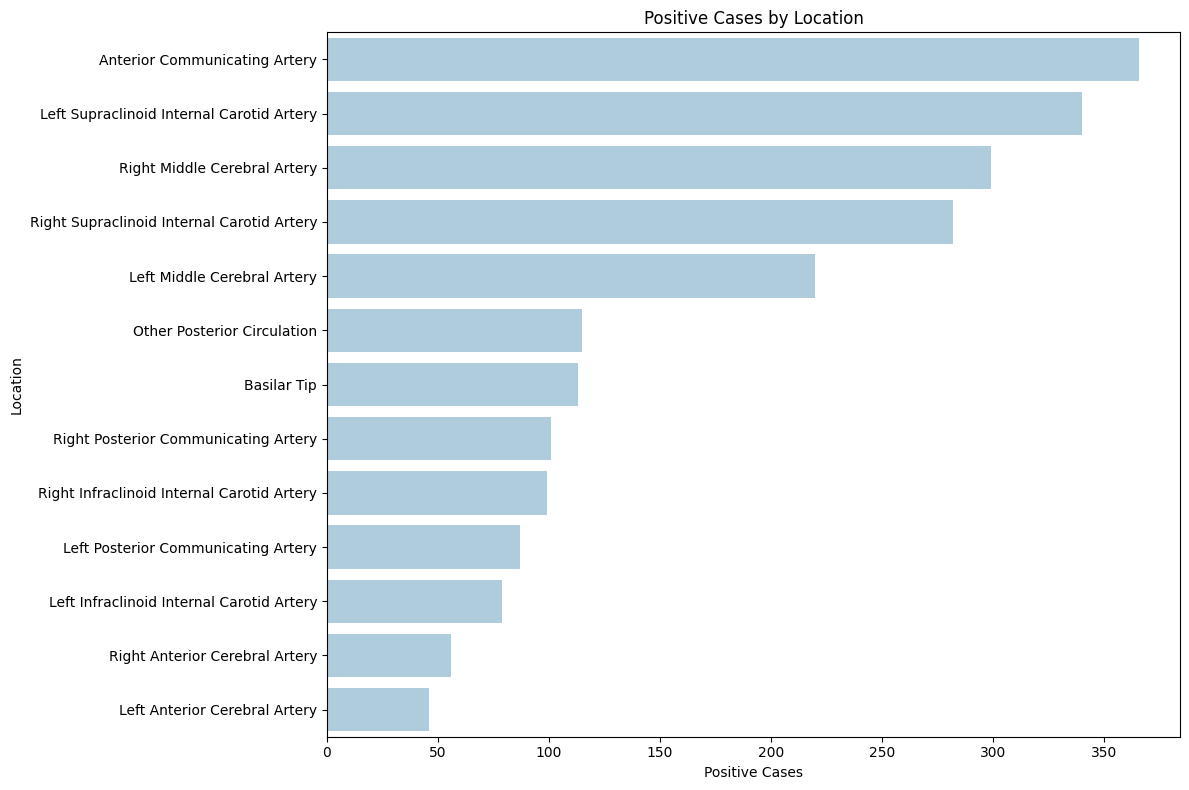

In [66]:
plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.values, y=location_counts.index, orient='h')
plt.title("Positive Cases by Location")
plt.xlabel("Positive Cases")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

## Train Localizers

In [67]:
train_localizer = pd.read_csv("./data/train_localizers.csv", index_col="SeriesInstanceUID")
print(train_localizer.shape)

train_localizer.head()

(2286, 3)


,SOPInstanceUID,coordinates,location
SeriesInstanceUID,,,
1.2.826.0.1.3680043.8.498.10005158603912009425635473100344077317,1.2.826.0.1.3680043.8.498.10775329348174902199...,"{'x': 258.3621186176837, 'y': 261.359900373599}",Other Posterior Circulation
1.2.826.0.1.3680043.8.498.10022796280698534221758473208024838831,1.2.826.0.1.3680043.8.498.53868409774237283281...,"{'x': 194.87253141831238, 'y': 178.32675044883...",Right Middle Cerebral Artery
1.2.826.0.1.3680043.8.498.10023411164590664678534044036963716636,1.2.826.0.1.3680043.8.498.24186535344744886473...,"{'x': 189.23979878597123, 'y': 209.19184886465...",Right Middle Cerebral Artery
1.2.826.0.1.3680043.8.498.10030095840917973694487307992374923817,1.2.826.0.1.3680043.8.498.75217084841854214544...,"{'x': 208.2805049088359, 'y': 229.78962131837307}",Right Infraclinoid Internal Carotid Artery
1.2.826.0.1.3680043.8.498.10034081836061566510187499603024895557,1.2.826.0.1.3680043.8.498.71237104731452368587...,"{'x': 249.86745590416498, 'y': 220.623044646393}",Anterior Communicating Artery


In [30]:
# Compare location value counts
localizer_location_counts = train_localizer['location'].value_counts().sort_values(ascending=False)
print("Localizers by location:")
print(localizer_location_counts)
print(f"Total: {localizer_location_counts.sum()}")

print("\nTrain.csv by location:")
print(location_counts)
print(f"Total: {location_counts.sum()}")

Localizers by location:
location
Anterior Communicating Artery                 375
Left Supraclinoid Internal Carotid Artery     354
Right Middle Cerebral Artery                  317
Right Supraclinoid Internal Carotid Artery    293
Left Middle Cerebral Artery                   226
Other Posterior Circulation                   124
Basilar Tip                                   113
Right Infraclinoid Internal Carotid Artery    104
Right Posterior Communicating Artery          101
Left Posterior Communicating Artery            88
Left Infraclinoid Internal Carotid Artery      83
Right Anterior Cerebral Artery                 62
Left Anterior Cerebral Artery                  46
Name: count, dtype: int64
Total: 2286

Train.csv by location:
Anterior Communicating Artery                 366
Left Supraclinoid Internal Carotid Artery     340
Right Middle Cerebral Artery                  299
Right Supraclinoid Internal Carotid Artery    282
Left Middle Cerebral Artery                   220
Other

## Number of SeriesInstanceUIDs Have at Least One Localization Point

In [35]:
unique_series_with_localizations = train_localizer.index.nunique()
print(f"SeriesInstanceUIDs with at least one localization point: {unique_series_with_localizations}")

SeriesInstanceUIDs with at least one localization point: 1890
